# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but we do have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020) (whenever COVID isn't ruining things, at least).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [1]:
import pandas as pd

## 1. Read in the file using pandas, and look at the first five rows

In [3]:

! pip install xlrd
df = pd.read_excel('KyotoFullFlower7.xls')
df.head(5)

  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.


* **TIP:** Look at the documentation for `read_excel` and `read_csv` to see if there's anything that allows you to skip rows*
* **TIP:** The first year should be 801 AD, and it should not have any dates or anything.

In [11]:
df = pd.read_excel('KyotoFullFlower7.xls',skiprows=25)
df.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 3. Look at a random selection of 10 rows of data

In [12]:
df.sample(10)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
706,1507,108.0,418.0,1.0,2.0,MOTONAGA-KYOKI
102,903,NaN,NaN,NaN,NaN,-
359,1160,NaN,NaN,NaN,NaN,-
569,1370,109.0,419.0,3.0,2.0,GOGUMAISHO
548,1349,112.0,422.0,3.0,2.0,ZOKU-SHIGUSHO
606,1407,101.0,411.0,3.0,2.0,(SHIRYO-SORAN)
106,907,NaN,NaN,NaN,NaN,-
708,1509,102.0,412.0,1.0,2.0,SANETAKA-KOKI
622,1423,96.0,406.0,3.0,1.0,KANMON-GYOKI(FUSHIMI)
254,1055,NaN,NaN,NaN,NaN,-


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [13]:
df = pd.read_excel('KyotoFullFlower7.xls',skiprows=25, na_values='-')
df.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


In [15]:
df.sample(10)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
310,1111,113.0,423.0,3.0,2.0,EISHOKI
559,1360,101.0,410.0,3.0,2.0,GUKANKI
1090,1891,99.0,409.0,4.0,0.0,NEWS-PAPER(ARASHIYAMA)
1034,1835,112.0,422.0,3.0,2.0,SUGIURAKE-NIKKI
581,1382,105.0,415.0,3.0,2.0,KUGE-NICHIYO-KUFU-RYAKUSHU
902,1703,103.0,413.0,3.0,1.0,MYOHOIN-HINAMIKI
1181,1982,93.0,403.0,3.0,0.0,NEWS-PAPER(ARASHIYAMA)
1162,1963,101.0,411.0,3.0,0.0,NEWS-PAPER(ARASHIYAMA)
1030,1831,114.0,424.0,3.0,2.0,RAI-SANYO-NIPPU
396,1197,NaN,NaN,NaN,NaN,NaN


## 4. What source is the most common as a reference?

In [17]:
df['Reference Name'].value_counts()

NEWS-PAPER(ARASHIYAMA)        94
SUGIURAKE-NIKKI               38
MYOHOIN-HINAMIKI              32
OYUDONONO-UENO-NIKKI          26
OYUDONONO-UENO-NIKKI [EDA]    21
                              ..
GONARAIN-GYOSEI-BASSHO         1
MORIMITSU-KOKI                 1
SANKAIKI                       1
TSUKIMOUDE-WAKASHU(PART-3)     1
NEWS-PAPET(DAIGO-JI)           1
Name: Reference Name, Length: 222, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [27]:
dates_df = df[df['Full-flowering date (DOY)'].isna() == False]

dates_df.shape

(827, 6)

## 7. Make a histogram of the full-flowering date

<AxesSubplot: >

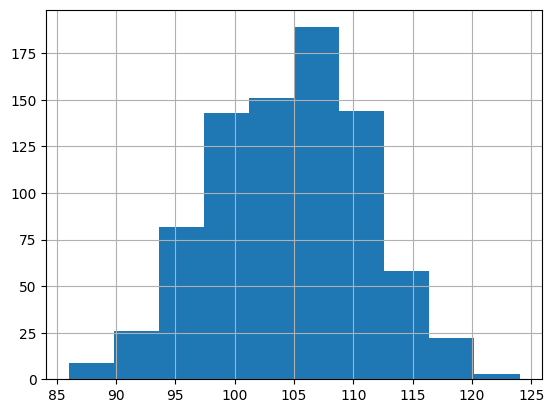

In [28]:
dates_df['Full-flowering date (DOY)'].hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

<AxesSubplot: >

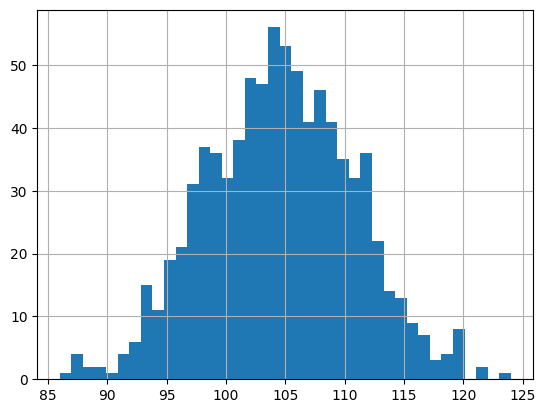

In [29]:
dates_df['Full-flowering date (DOY)'].hist(bins=39)

## 9a. What's the average number of days it takes for the flowers to blossom? 

In [32]:
dates_df['Full-flowering date (DOY)'].describe()

count    827.000000
mean     104.540508
std        6.407036
min       86.000000
25%      100.000000
50%      105.000000
75%      109.000000
max      124.000000
Name: Full-flowering date (DOY), dtype: float64

## 9b. And how many records do we have?

You can actually answer this one and the last one with a single line of code.

In [ ]:
# Assuming that meant describe()! Is that the case?

## 10. How many days into the year did cherry flowers normally blossom before 1900?



In [48]:
dates_df[dates_df['AD']<1900]['Full-flowering date (DOY)'].describe()

count    714.000000
mean     105.207283
std        6.365814
min       86.000000
25%      101.000000
50%      105.000000
75%      110.000000
max      124.000000
Name: Full-flowering date (DOY), dtype: float64

## 11. How about after 1900?

In [49]:
dates_df[dates_df['AD']>1900]['Full-flowering date (DOY)'].describe()

count    112.000000
mean     100.312500
std        4.921055
min       88.000000
25%       97.000000
50%       99.000000
75%      104.000000
max      112.000000
Name: Full-flowering date (DOY), dtype: float64

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [50]:
dates_df[dates_df['Data type code'] == 4]['AD'].count()

39

## 13. Show only the years where our data was from a title in Japanese poetry

In [51]:
dates_df[dates_df['Data type code'] == 4]['AD']

90       891
94       895
95       896
122      923
154      955
168      969
206     1007
232     1033
235     1036
259     1060
260     1061
283     1084
294     1095
381     1182
389     1190
400     1201
415     1216
418     1219
420     1221
422     1223
435     1236
464     1265
467     1268
468     1269
470     1271
488     1289
500     1301
523     1324
529     1330
646     1447
652     1453
653     1454
673     1474
733     1534
791     1592
839     1640
860     1661
1045    1846
1062    1863
Name: AD, dtype: int64

## 14. Graph the full-flowering date (DOY) over time

<AxesSubplot: >

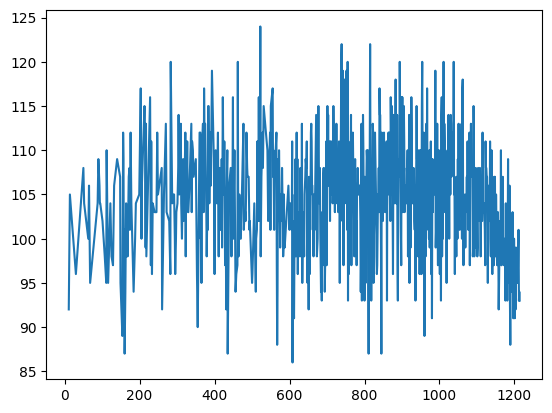

In [52]:
dates_df['Full-flowering date (DOY)'].plot()

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

```python
df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail()
```

In this case we're only looking at the final 5. You'll probably want to look at more!

/var/folders/8w/c7bhb4y56693wcs88hywlmq00000gn/T/ipykernel_46820/3596830981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates_df['rolling_date'] = dates_df.rolling(20, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean()


<AxesSubplot: >

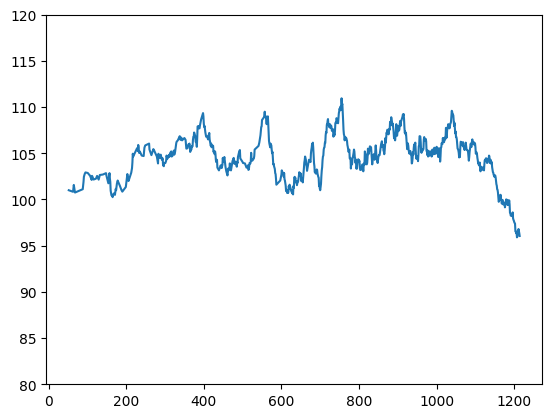

In [60]:
dates_df['rolling_date'] = dates_df.rolling(20, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean()

dates_df.rolling_date.plot(x='AD', y='Full-flowering date (DOY)', ylim=(80,120))

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

There are **at least two ways to do this.**

#### WAY ONE: The bad-yet-simple way

If you don't want to use `pd.to_datetime`, you can use this as an sample for updating March. It finds everything with a date less than 400 and assigns `March` to the `month` column:

```python
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'
```

#### WAY TWO: The good-yet-complicated way

* When you use `pd.to_datetime` pandas tries to figure out the date format automatically. If that doesn't work, you can also pass a `format=` argument that explains what the format is of the datetime. You use [the codes here](https://strftime.org/) to mark out where the days, months, etc are. For example, `2020-04-09` would be converted using `pd.to_datetime(df.colname, "format='%Y-%m-%d")`.
* `errors='coerce'` will return `NaN` for missing values.
* And remember how we used `df.date_column.dt.month` to get the number of the month? For the name, you use `dt.strftime` (string-formatted-time), and pass it [the same codes](https://strftime.org/) to tell it what to do. For example, `df.date_column.dt.strftime("%Y-%m-%d")` would give you `"2020-04-09"`.

In [78]:
# I found this format easier than working with the full-flowering date column, since the month and day aren't sepoarated by anything there.

dates_df['month'] = pd.to_datetime(dates_df['Full-flowering date (DOY)'], format='%j', errors='coerce').dt.month_name()

/var/folders/8w/c7bhb4y56693wcs88hywlmq00000gn/T/ipykernel_46820/2410136531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates_df['month'] = pd.to_datetime(dates_df['Full-flowering date (DOY)'], format='%j', errors='coerce').dt.month_name()


### 17. Using your new column, how many blossomings happened in each month?

In [77]:
dates_df.month.value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

### 18. Graph how many blossomings happened in each month.

<AxesSubplot: >

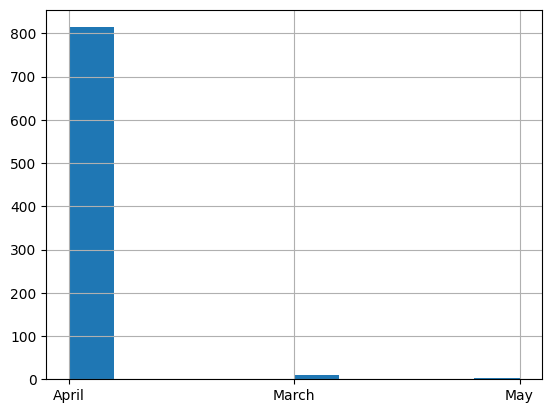

In [81]:
dates_df.month.hist()

### 19. Adding a day-of-month column

Now we're going to add a new column called `day_of_month.` Depending on what you did above, it might be a little tougher since the `Full-flowering date` column is a *float* instead of an integer.

*Tip: If your method involves `.astype(int)` it isn't going to work since it's missing data, you can add `.dropna().astype(int)` instead.*

In [87]:
dates_df['day_pf_month'] = pd.to_datetime(dates_df['Full-flowering date (DOY)'], format='%j', errors='coerce').dt.day

/var/folders/8w/c7bhb4y56693wcs88hywlmq00000gn/T/ipykernel_46820/1356142147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates_df['day_pf_month'] = pd.to_datetime(dates_df['Full-flowering date (DOY)'], format='%j', errors='coerce').dt.day


### 20. Adding a date column

If you don't have one yet, take the `'month'` and `'day_of_month'` columns and combine them in order to create a new string-like column called `'date'`. You could alternatively use `.dt.strftime` as mentioned above, or *just totally skip this one if you have an actual datetime column*.

In [88]:
dates_df['date'] = pd.to_datetime(dates_df['Full-flowering date (DOY)'], format='%j', errors='coerce')

/var/folders/8w/c7bhb4y56693wcs88hywlmq00000gn/T/ipykernel_46820/2103129490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates_df['date'] = pd.to_datetime(dates_df['Full-flowering date (DOY)'], format='%j', errors='coerce')


# YOU ARE DONE.

And **incredible.**